In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')

sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [3]:
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 21)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6,Automatic


In [4]:
# create data subset
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

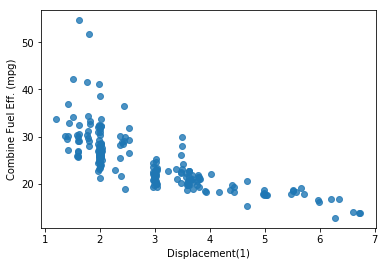

In [5]:
# plot fuel efficiency and transmission type
sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb', 
           x_jitter = 0.04, fit_reg = False);
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

## Plot 1: Add Color based on Transmission Type

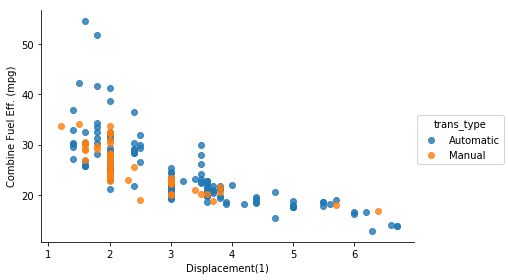

In [6]:
# add color based on transmission type
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'trans_type',
                hue_order = ['Automatic', 'Manual'], size = 4, aspect = 1.5)
g.map(sb.regplot,'displ','comb', fit_reg = False);
g.add_legend()
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

The more natural encoding supported by both Matplotlib and Seaborn is **color**. 

For categorical data, we can use Seaborn's `FacetGrid` and set `hue` argument to our column of choice. Then in the `map` method, we set the `regplot` function and our access variables. Additional `regplot` parameters are still set afterwards.

To change the order in which the levels are plotted (*Manual* points are on top of *Automatic*), we use the `hue_order` parameter in `FacetGrid`. We also set the `size=4`  and `aspect=1.5` so it will give us a larger plot.

## Plot 2: Color based on Vehicle Class

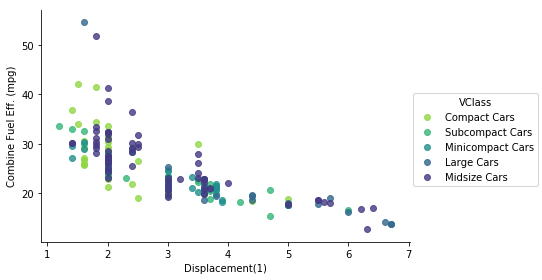

In [7]:
# add color based on vehicle class
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'VClass',
               size = 4, aspect = 1.5, palette = 'viridis_r')
g.map(sb.regplot,'displ','comb', fit_reg = False);
g.add_legend()
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

`VClass` is an ordered variable, so the qualitative palette doesn't work quite well.

To set a sequential palette, we can set the `palette='viridis_r'` in the `FacetGrid`.

## Plot 3: Color based on CO2 Emissions


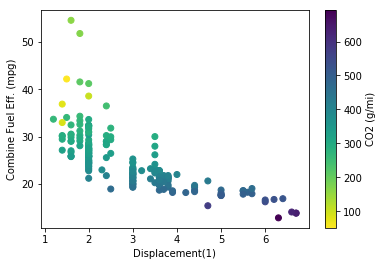

In [8]:
# add color based on C02 emissions
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'co2',
               cmap = 'viridis_r')
plt.colorbar(label ='CO2 (g/mi)')
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

If we have a numeric variable like `co2`, we shouldn't use the `hue` parameter in `FacetGrid` to set the variable, since `FacetGrid` only expects to facet across categorical variables. If we do that, we will get a long and messy legend with one color for every unique `co2` value in a rank ordered color scheme.

Instead we should use the basic Matplotlib's `plt.scatter` function to create our plot. We lose the convenient `x_jitter` but there is an interaction in the color parameters in `regplot` that make coloring by values hard to do. With `plt.scatter`, we simply need to add a third numeric variable via color using the `c` parameter and different color palettes using the `cmap` parameter. Then, use the `plt.colormap` to add a color bar to the plot with a `label` parameter to provide the color map units.